<h1>
<font color="#ff2e2e">
Mask Overlay
</font>
</h1>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import dlib
from imutils import face_utils

In [ ]:
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK

!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

datFile =  "/content/shape_predictor_68_face_landmarks.dat"

--2023-04-30 18:48:37--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M   132MB/s    in 0.5s    

2023-04-30 18:48:38 (132 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [ ]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Complete put_mask function </font></h3>

In [ ]:
from numpy.core.multiarray import result_type
def put_mask(face, mask):
    '''
    Adds mask image on face image.
    
    Parameters:
        face (numpy.ndarray): face image.
        mask (numpy.ndarray): mask image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    # Your code #

    result = face.copy()
    #loads face detector object 
    detector = dlib.get_frontal_face_detector()
   
    #loads a pre-trained model predicting the locations of facial landmarks
    predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
   
    #convert to gray
    gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
   
    #gives us all the face rectanhgles 
    rects = detector(gray, 1)

    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rects[0])	 
    shape = face_utils.shape_to_np(shape)

    for (x, y) in shape:
      cv2.circle(result, (x, y), 6, (0, 0, 255), -1)
    
    src_pts = np.array([(33 , 318) , (607 , 146) , (1164 , 316) , (606 , 695)] , np.float32)
    dst_pts = np.array([shape[2] , shape[29] , shape[14] , shape[8]], np.float32)
    
    #apply perspective transformation to the input image
    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    #perspective transformation to mask
    new_mask = cv2.warpPerspective(mask, M, (face.shape[1], face.shape[0]))
    
    for i in range(face.shape[0]):
      for j in range(face.shape[1]):
        if new_mask[i][j].any() != 0:
          result[i][j] = new_mask[i][j]
  
    #############
    
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

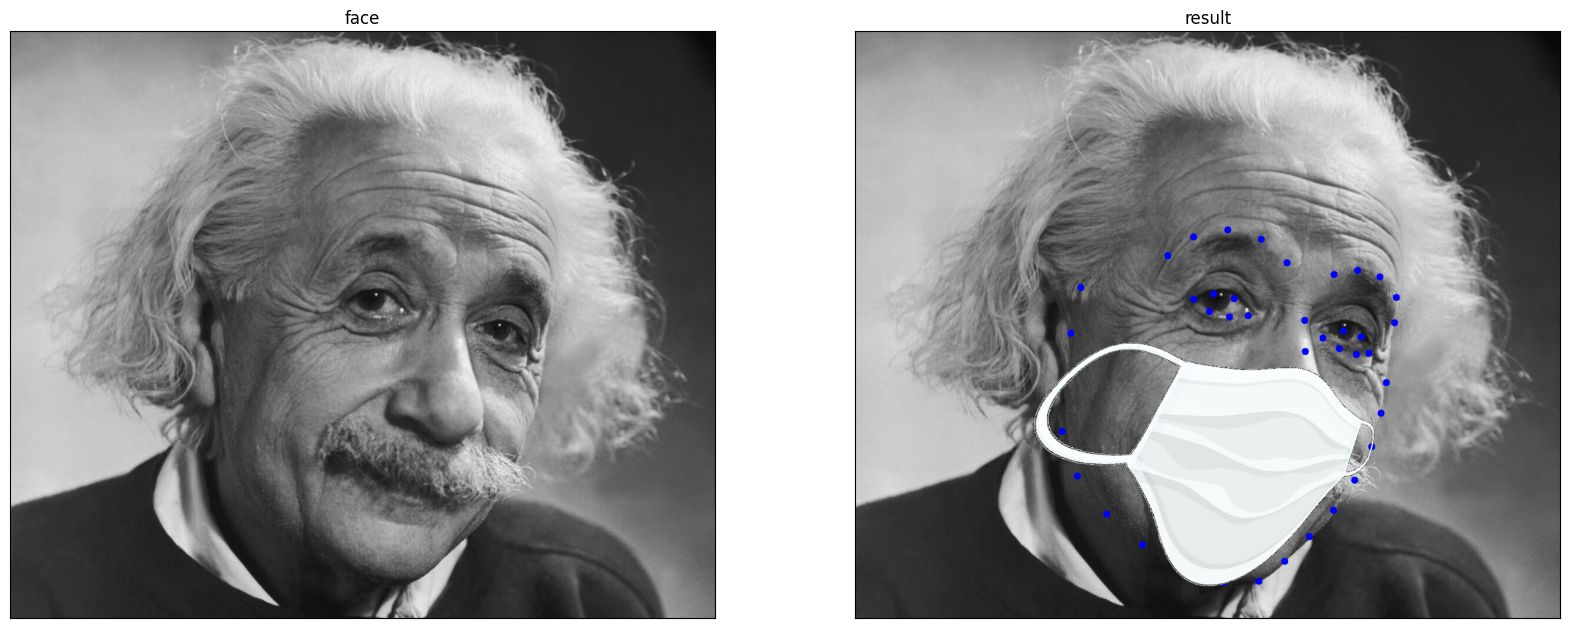

In [ ]:
image_list = []
face = cv2.cvtColor(cv2.imread(os.path.join('images/Q3', 'face.jpg')), cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(cv2.imread(os.path.join('images/Q3', 'mask.jpg')), cv2.COLOR_BGR2RGB)
image_list.append([face, 'face', 'img'])
image_list.append([put_mask(face, mask), 'result', 'img'])
plotter(image_list, 1, 2, True, 20, 10, '3')